# Henkes _et al._, Nat. Comm. (2020)

[__DOI:__ 10.1038/s41467-020-15164-5](https://doi.org/10.1038/s41467-020-15164-5)

In [1]:
from coll_dyn_activem.plot import list_colormap

## Autocorrelation of velocity

In [2]:
def Cvv(t, a=1.0, v0=1.0, zeta=1.0, mu=0.5, tau=1.0):
    """
    Temporal autocorrelation function of the velocity field. (SI, Eq. 57)
    Assumes B + \\mu = 4.3 \\mu.
    """

    return (((a**2)*(v0**2)*zeta)/(4.0*tau*gp(pi)))*numerical_integral(
        lambda q: q*(
            ((4.3*mu*(q^2)*exp(-4.3*mu*(q^2)*t/zeta) - (zeta/tau)*exp(-t/tau))
                /(((4.3*mu)^2)*(q^4) - (zeta/tau)^2))
            + ((mu*(q^2)*exp(-mu*(q^2)*t/zeta) - (zeta/tau)*exp(-t/tau))
                /((mu^2)*(q^4) - (zeta/tau)^2))),
        0.0, 2*pi/a)[0]

/usr/local/miniconda3/lib/python3.7/site-packages/matplotlib/axes/_base.py:3157: UserWarning: Attempted to set non-positive xlimits for log-scale axis; invalid limits will be ignored.
  'Attempted to set non-positive xlimits for log-scale axis; '


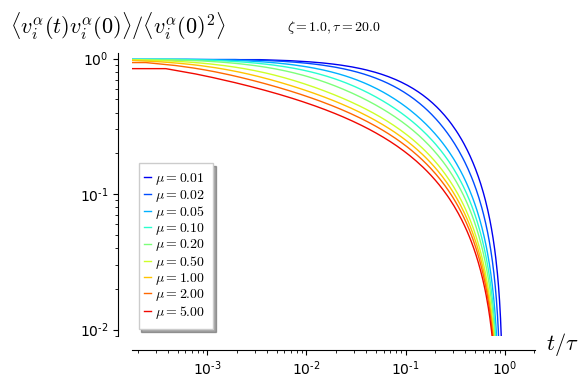

In [3]:
_mu = [0.01, 0.02, 0.05, 0.1, 0.2, 0.5, 1, 2, 5]
colors = list_colormap(_mu, colormap='jet', sort=True)
zeta = 1.0
tau = 20.0

Cvv0 = {mu: Cvv(0, mu=mu, zeta=zeta, tau=tau) for mu in _mu}
p = [plot(lambda t: Cvv(tau*t, mu=mu, zeta=zeta, tau=tau)/Cvv0[mu],
    (0, 2),
    scale='loglog', xmin=1e-2, xmax=2, ymin=1e-2, ymax=1e0,
    rgbcolor=colors[mu][:-1], legend_label=r'$\mu=%.2f$' % mu,
    axes_labels=[
        r'$t/\tau$',
        r'$\langle v^{\alpha}_i(t) v^{\alpha}_i(0)\rangle$'
            +r'$/\langle v^{\alpha}_i(0)^2\rangle$'],
    title=r'$\zeta=%.1f, \tau=%.1f$' % (zeta, tau))
    for mu in _mu]
sum(p)

In [4]:
sum(p).save("henkes_natcomm_2020_eq57.eps")
sum(p).save("henkes_natcomm_2020_eq57.svg")

/usr/local/miniconda3/lib/python3.7/site-packages/matplotlib/axes/_base.py:3157: UserWarning: Attempted to set non-positive xlimits for log-scale axis; invalid limits will be ignored.
  'Attempted to set non-positive xlimits for log-scale axis; '
